In [1]:
from scipy.ndimage import correlate
import numpy as np
from skimage import color, io, measure, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import threshold_otsu

In [2]:
input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [3]:
weights = [[0, 1, 0],[1, 2, 1],[0, 1, 0]]

In [4]:
for i in weights:
    print(i)

[0, 1, 0]
[1, 2, 1]
[0, 1, 0]


In [5]:
res_img = correlate(input_img, weights)

In [6]:
print(res_img), print(res_img[3,3])

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]
108


(None, None)

In [7]:
#108 because:
i_range = range(2, 5)
j_range = range(2, 5)
correlation = 0
string = ''
for i in i_range:
    for j in j_range:
        string += str(weights[i-2][j-2]) + '*' + str(input_img[i][j]) + '+'
        correlation += weights[i-2][j-2]*input_img[i][j]
print(string[:-1] + '=' + str(correlation))

0*12+1*13+0*14+1*17+2*18+1*19+0*22+1*23+0*24=108


In [8]:
res_img_1 = correlate(input_img, weights, mode="constant", cval=10)

In [9]:
print(res_img_1)

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]


In [10]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "Gaussian.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

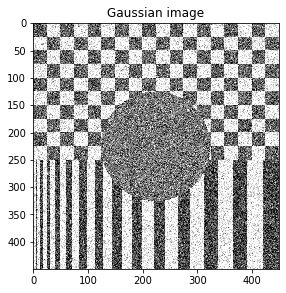

In [11]:
io.imshow(im_org)
plt.title('Gaussian image')
io.show()

In [12]:
size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

In [13]:
res_img = correlate(im_org, weights)

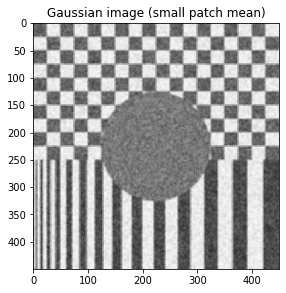

In [14]:
io.imshow(res_img)
plt.title('Gaussian image (small patch mean)')
io.show()

In [15]:
size = 20
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

In [16]:
res_img = correlate(im_org, weights)

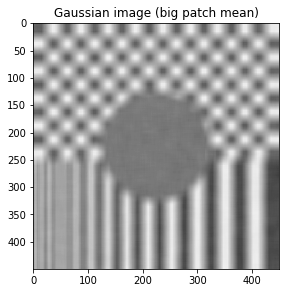

In [17]:
io.imshow(res_img)
plt.title('Gaussian image (big patch mean)')
io.show()

In [18]:
size = 5
footprint = np.ones([size, size])
med_img = median(im_org, footprint)

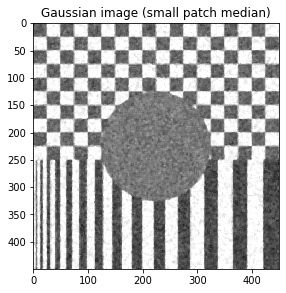

In [19]:
io.imshow(med_img)
plt.title('Gaussian image (small patch median)')
io.show()

In [20]:
size = 20
footprint = np.ones([size, size])
med_img = median(im_org, footprint)

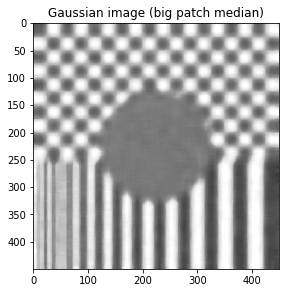

In [21]:
io.imshow(med_img)
plt.title('Gaussian image (big patch median)')
io.show()

In [22]:
sigma = 2
gauss_img = gaussian(im_org, sigma)

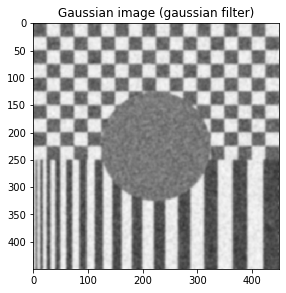

In [23]:
io.imshow(gauss_img)
plt.title('Gaussian image (gaussian filter)')
io.show()

In [24]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "donald_1.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)
im_org = color.rgb2gray(im_org)

In [25]:
prewit_h_img = prewitt_h(im_org)
prewit_v_img = prewitt_v(im_org)
prewit_img = prewitt(im_org)

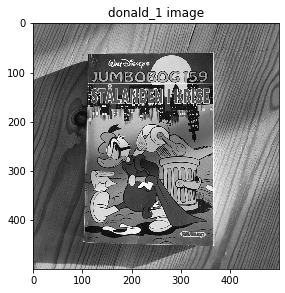

In [26]:
io.imshow(im_org)
plt.title('donald_1 image')
io.show()

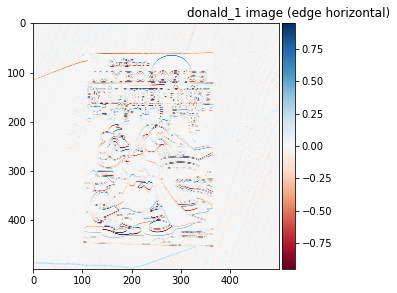

In [27]:
io.imshow(prewit_h_img)
plt.title('donald_1 image (edge horizontal)')
io.show()

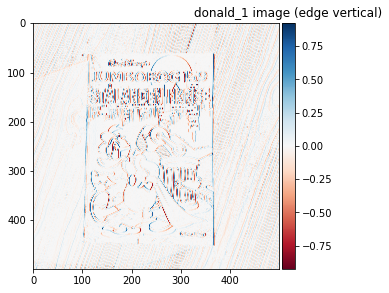

In [28]:
io.imshow(prewit_v_img)
plt.title('donald_1 image (edge vertical)')
io.show()

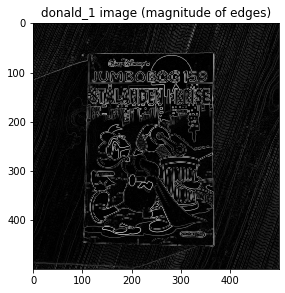

In [29]:
io.imshow(prewit_img)
plt.title('donald_1 image (magnitude of edges)')
io.show()

In [30]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "ElbowCTSlice.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

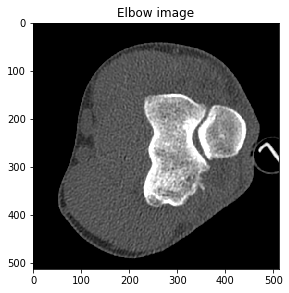

In [31]:
io.imshow(im_org)
plt.title('Elbow image')
io.show()

In [32]:
sigma = 3
gauss_img = gaussian(im_org, sigma)

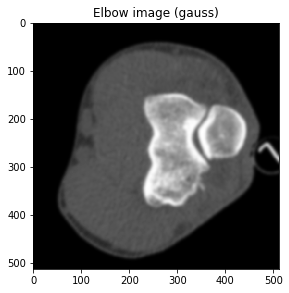

In [33]:
io.imshow(gauss_img)
plt.title('Elbow image (gauss)')
io.show()

In [34]:
prewit_img = prewitt(gauss_img)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


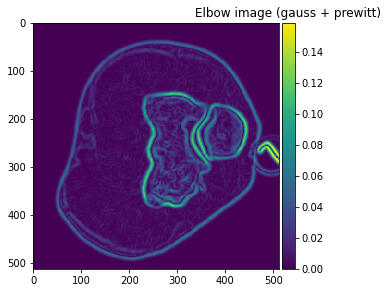

In [35]:
io.imshow(prewit_img)
plt.title('Elbow image (gauss + prewitt)')
io.show()

In [36]:
np.min(prewit_img), np.max(prewit_img), prewit_img.dtype

(0.0, 0.158933742187848, dtype('float64'))

In [37]:
thres = threshold_otsu(prewit_img)

In [38]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    return img_as_ubyte(img_in > thres)

In [39]:
img_thres = threshold_image(prewit_img, thres)

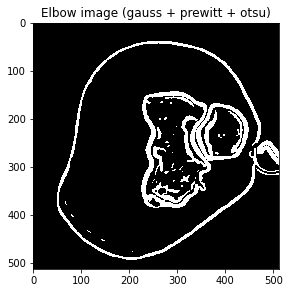

In [40]:
io.imshow(img_thres)
plt.title('Elbow image (gauss + prewitt + otsu)')
io.show()